# In depth: Support Vector Machines

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

- Generative classification: e.g. naive bayes. Classifies by assuming an underlying distribution for each class.
- Discriminative classification: e.g. support vector machines. Just find a line, curve, or manifold that divides classes from one another.

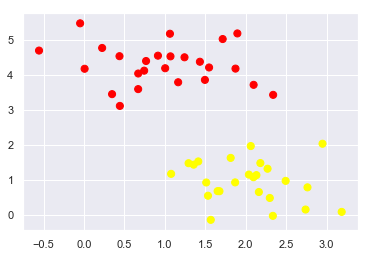

In [13]:
# Make a scatterplot from make_blobs, with an autumn color map, colored by the target array, 50 points, 2 centers, a standard deviation of 0.6 in each cluster, and a random state to keep track.


- Use support vector machines to classify the above dataset.
- Intuition: rather than drawing a zero-width line between classes, draw around each line a *margin* of some width, up to the nearest point.

(-1, 3.5)

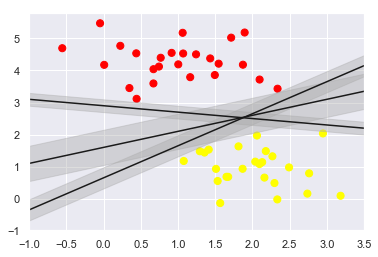

In [36]:
xfit = np.linspace(-1, 3.5)

# Make another scatter plot, same parameters as above
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

- Support vector machines find the line that maximizes the size of this margin.

### Fitting a support vector machine

In [46]:
# Import the support vector classifier from sklearn
from sklearn.svm import SVC

# Make a linear SVC, with C set to 1E10.
model = SVC(C=1E10, kernel='linear')

# Fit the SVC to the X, y blobs data
model.fit(X, y)

# Make a convenience routine to visualize stuff
def plot_svc_decision(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create a grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

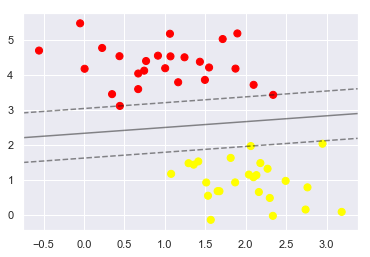

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision(model);

- Points that touch the dashed lines are called the support vectors: these are what give the algorithm its name

In [50]:
# Return the locations of the support vectors for the model


array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

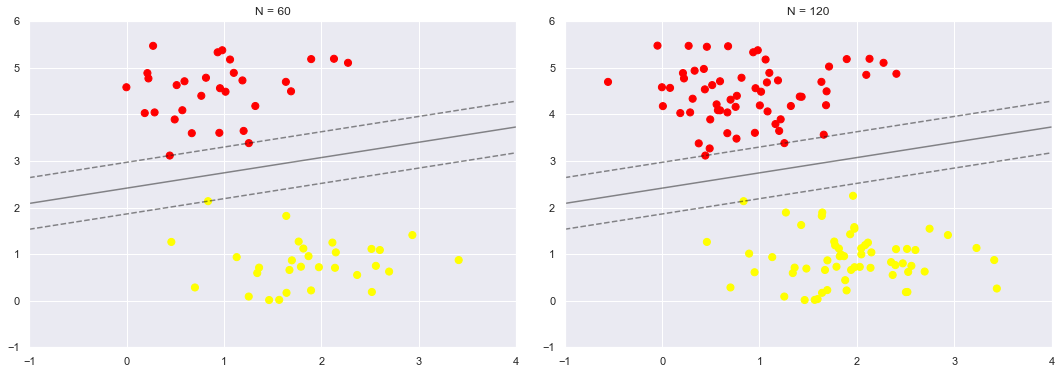

In [54]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, 
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- Support vectors are insensitive to the behavior of distant points

#### Beyond linear boundaries: Kernel SVM

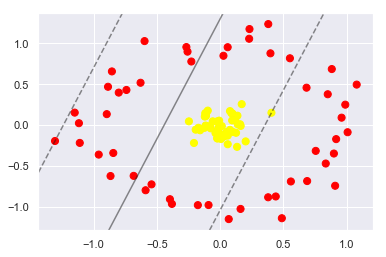

In [60]:
# Grab the make_circles class from sklearn.datasets.samples_generator
from sklearn.datasets.samples_generator import make_circles

# Make a features matrix and target vector of circles
X, y = make_circles(100, factor=.1, noise=.1)

# make a linear SVC, fit it to X and y
clf = SVC(kernel='linear').fit(X, y)

# Plot the svc_decision and the scatterplot of the circles
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf, plot_support=False)

In [61]:
# Compute a radial basis function centered on the center clump
r = np.exp(-(X ** 2).sum(1))

In [67]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

**Kernel Transformations**: Compute a basis function centered at every point in the dataset, and let an algorithm sift through the results
(similarity relationship or 'kernel' between each pair of points)

In [68]:
# Instantiate an SVC with a radial basis function and a high C-value, then fit it to X and y

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

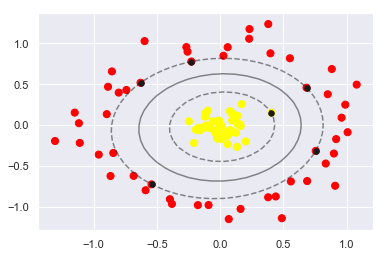

In [75]:
# Make a scatter plot of the output of this SVC on the circle data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=30, lw=1, facecolors='none', c='k')

### Tuning the SVM: Softening margins

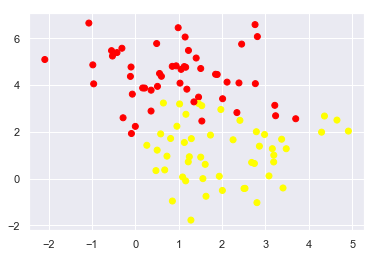

In [79]:
# Make blobs with 2 centers, 100 samples, and a std of 1.2
X, y = make_blobs(centers=2, cluster_std=1.2,
                  random_state=0, n_samples=100)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

- Large C means the margin is hard, smaller C softens the margin

Text(0.5,1,'C = 0.1')

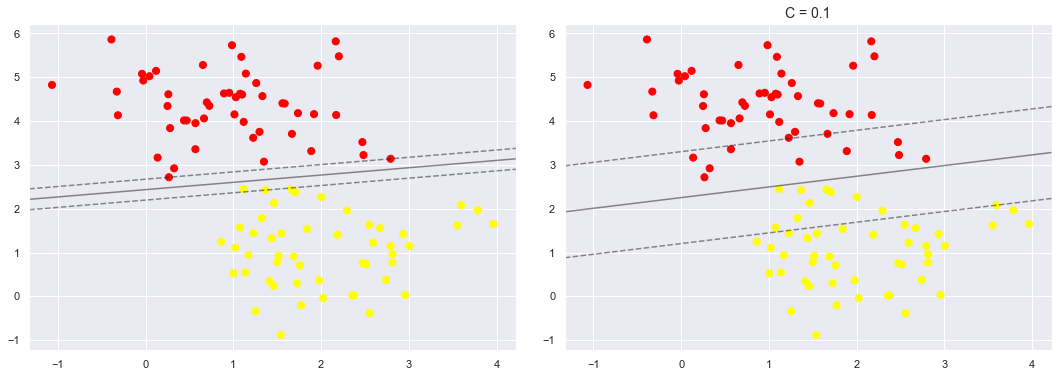

In [83]:
X, y = make_blobs(centers=2, cluster_std=0.8,
                  random_state=0, n_samples=100)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
axi.set_title('C = {0:.1f}'.format(C), size=14)